In [15]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [13]:
filename = 'IBM Employee Data.csv'
df_ibm = pd.read_csv(filename,dtype = unicode)
print df_ibm.shape
print df_ibm.columns


df_ibm['Age'] = df_ibm['Age'].astype(int)
df_ibm['DistanceFromHome'] = df_ibm['DistanceFromHome'].astype(int)
df_ibm['EmployeeCount'] = df_ibm['EmployeeCount'].astype(int)
df_ibm['MonthlyIncome'] = df_ibm['MonthlyIncome'].astype(int)
df_ibm['YearsAtCompany'] = df_ibm['YearsAtCompany'].astype(int)
df_ibm['YearsWithCurrManager'] = df_ibm['YearsWithCurrManager'].astype(int)
df_ibm['TotalWorkingYears'] = df_ibm['TotalWorkingYears'].astype(int)
df_ibm['YearsSinceLastPromotion'] = df_ibm['YearsSinceLastPromotion'].astype(int)
df_ibm['HourlyRate'] = df_ibm['HourlyRate'].astype(int)
df_ibm['JobLevel'] = df_ibm['JobLevel'].astype(int)
df_ibm['NumCompaniesWorked'] = df_ibm['NumCompaniesWorked'].astype(int)
df_ibm['PercentSalaryHike'] = df_ibm['PercentSalaryHike'].astype(int)
df_ibm['WorkLifeBalance'] = df_ibm['WorkLifeBalance'].astype(int)



bins = [0,25,35,45,60,100]
df_ibm['age_bins'] = pd.cut(df_ibm['Age'],bins)
df_ibm['age_bins'] = df_ibm['age_bins'].astype(str)

mi_bins = [0,2500,4000,6000,8000,20000]
df_ibm['Monthly Income'] = pd.cut(df_ibm['MonthlyIncome'],mi_bins)
df_ibm['Monthly Income'] = df_ibm['Monthly Income'].astype(str)

(1470, 35)
Index([u'Age', u'Attrition', u'BusinessTravel', u'DailyRate', u'Department',
       u'DistanceFromHome', u'Education', u'EducationField', u'EmployeeCount',
       u'EmployeeNumber', u'EnvironmentSatisfaction', u'Gender', u'HourlyRate',
       u'JobInvolvement', u'JobLevel', u'JobRole', u'JobSatisfaction',
       u'MaritalStatus', u'MonthlyIncome', u'MonthlyRate',
       u'NumCompaniesWorked', u'Over18', u'OverTime', u'PercentSalaryHike',
       u'PerformanceRating', u'RelationshipSatisfaction', u'StandardHours',
       u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear',
       u'WorkLifeBalance', u'YearsAtCompany', u'YearsInCurrentRole',
       u'YearsSinceLastPromotion', u'YearsWithCurrManager'],
      dtype='object')


# Attrition by Salary Hike received

Text(0.5,1,'Attrition by % Salary hike')

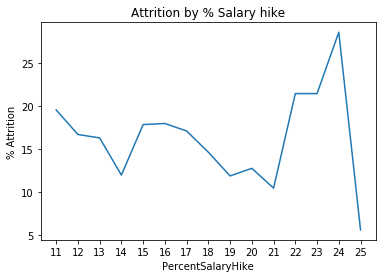

In [3]:
df_hike = pd.crosstab(df_ibm['PercentSalaryHike'],df_ibm['Attrition'] )
df_hike['Attrition'] = df_hike['Yes']*100.0/(df_hike['Yes']+df_hike['No'])
#print df_age.head(3)
df_hike = df_hike.reset_index()
#df_hike['PercentSalaryHike'] = df_hike['PercentSalaryHike'].astype(int)
plt.plot(df_hike['PercentSalaryHike'],df_hike['Attrition'])
xlabel('PercentSalaryHike')
ylabel('% Attrition')
title('Attrition by % Salary hike')


Text(0.5,1,'Attrition by % Salary hike')

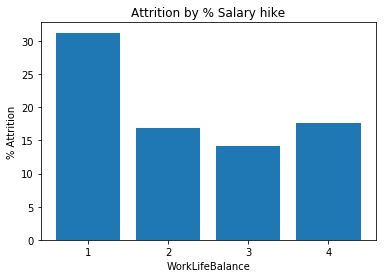

In [4]:
df_hike = pd.crosstab(df_ibm['WorkLifeBalance'],df_ibm['Attrition'] )
df_hike['Attrition'] = df_hike['Yes']*100.0/(df_hike['Yes']+df_hike['No'])
#print df_age.head(3)
df_hike = df_hike.reset_index()
#df_hike['MaritalStatus'] = df_hike['MaritalStatus'].astype(int)
plt.bar(df_hike['WorkLifeBalance'],df_hike['Attrition'])
xlabel('WorkLifeBalance')
ylabel('% Attrition')
title('Attrition by % Salary hike')


# Attrition by Performance Rating

<bound method DataFrame.head of Attrition PerformanceRating    No  Yes  Attrition
0                         3  1044  200  16.077170
1                         4   189   37  16.371681>


Text(0.5,1,'Attrition by Performance Rating')

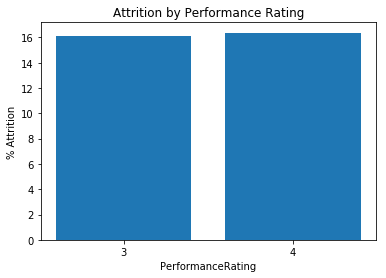

In [5]:
df_perfrat = pd.crosstab(df_ibm['PerformanceRating'],df_ibm['Attrition'] )
df_perfrat['Attrition'] = df_perfrat['Yes']*100.0/(df_perfrat['Yes']+df_perfrat['No'])
df_perfrat = df_perfrat.reset_index()
print df_perfrat.head
plt.bar(df_perfrat['PerformanceRating'],df_perfrat['Attrition'],)
xlabel('PerformanceRating')
ylabel('% Attrition')
title('Attrition by Performance Rating')

# Attrition by Years Since Last Promotion

Text(0.5,1,'Attrition by Years Since Last Promotion')

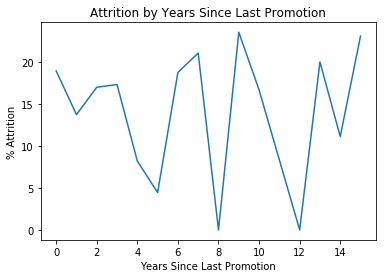

In [6]:
df_lastpro = pd.crosstab(df_ibm['YearsSinceLastPromotion'],df_ibm['Attrition'] )
df_lastpro['Attrition'] = df_lastpro['Yes']*100.0/(df_lastpro['Yes']+df_lastpro['No'])
#print df_hourly.head(3)
df_lastpro = df_lastpro.reset_index()
df_lastpro['YearsSinceLastPromotion'] = df_lastpro['YearsSinceLastPromotion'].astype(int)
df_lastpro = df_lastpro.sort_values(by = 'YearsSinceLastPromotion')
plt.plot(df_lastpro['YearsSinceLastPromotion'],df_lastpro['Attrition'])
xlabel('Years Since Last Promotion')
ylabel('% Attrition')
title('Attrition by Years Since Last Promotion')

# Attrition by Years with Current Manager

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

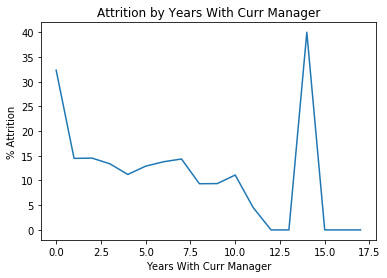

In [7]:
df_yrcurman = pd.crosstab(df_ibm['YearsWithCurrManager'],df_ibm['Attrition'] )
df_yrcurman['Attrition'] = df_yrcurman['Yes']*100.0/(df_yrcurman['Yes']+df_yrcurman['No'])
#print df_jobsati.head(3)
df_yrcurman = df_yrcurman.reset_index()
df_yrcurman['YearsWithCurrManager'] = df_yrcurman['YearsWithCurrManager'].astype(int)
df_yrcurman = df_yrcurman.sort_values(by = 'YearsWithCurrManager')
plt.plot(df_yrcurman['YearsWithCurrManager'],df_yrcurman['Attrition'])
xlabel('Years With Curr Manager')
ylabel('% Attrition')
title('Attrition by Years With Curr Manager')

df_ibm['YearsWithCurrManager'].value_counts()

# Age Distribution

Text(0.5,1,'Age distribution of IBM employees')

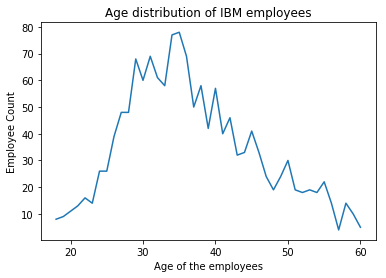

In [8]:
df_agedist = df_ibm['Age'].value_counts().reset_index()
df_agedist = df_agedist.sort_values(by = 'index')
df_agedist['index'] = df_agedist['index'].astype(int)

plt.plot(df_agedist['index'],df_agedist['Age'])
xlabel('Age of the employees')
ylabel('Employee Count')
title('Age distribution of IBM employees')

# Gender Distribution

Text(0.5,1,'Gender distribution of IBM employees')

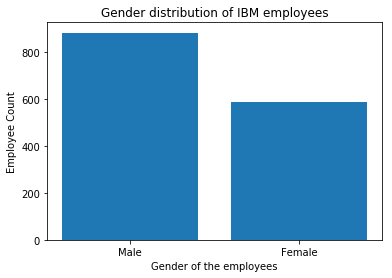

In [9]:
df_gender = df_ibm['Gender'].value_counts().reset_index()

plt.bar(df_gender['index'],df_gender['Gender'])
xlabel('Gender of the employees')
ylabel('Employee Count')
title('Gender distribution of IBM employees')

# Employees per department

Text(0.5,1,'Employee distribution across Departments')

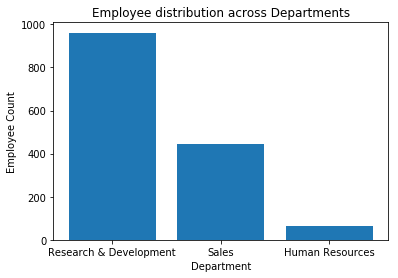

In [10]:
df_dept = df_ibm['Department'].value_counts().reset_index()

plt.bar(df_dept['index'],df_dept['Department'])
xlabel('Department')
ylabel('Employee Count')
title('Employee distribution across Departments')

# Years at the company

Text(0.5,1,'Employee distribution by years in the company')

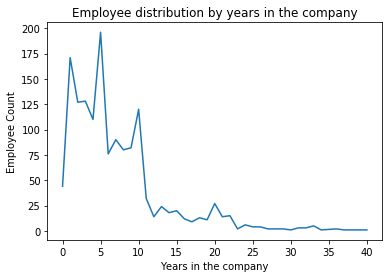

In [11]:
df_yrscomp = df_ibm['YearsAtCompany'].value_counts().reset_index()
df_yrscomp['index'] = df_yrscomp['index'].astype(int)

df_yrscomp = df_yrscomp.sort_values(by = 'index')

plt.plot(df_yrscomp['index'],df_yrscomp['YearsAtCompany'])
xlabel('Years in the company')
ylabel('Employee Count')
title('Employee distribution by years in the company')

# Comparing High Attrition group vs Low Attirion group

Attrition                       No  Yes
JobRole         MaritalStatus          
Sales Executive Divorced        63    6
                Married        131   20


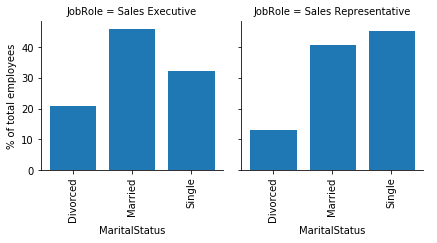

In [16]:



df_ibm_new = df_ibm[df_ibm['JobRole'] == 'Sales Representative']
df_ibm_new = df_ibm_new.append(df_ibm[df_ibm['JobRole'] == 'Sales Executive'])

xcol = 'MaritalStatus'
pivot_edf = pd.pivot_table (df_ibm_new,index = ['JobRole',xcol],columns = 'Attrition', values = 'EmployeeCount',aggfunc = sum)
print pivot_edf.head(2)
new_edf = pivot_edf.reset_index()

edfield_total = df_ibm.groupby('JobRole')['EmployeeCount'].sum()

new_edf = new_edf.merge(edfield_total, on = 'JobRole',suffixes = ['_left','_right'])
new_edf['% of total employees'] = (new_edf['No']+new_edf['Yes'])*100/new_edf['EmployeeCount']

#print new_edf
g = sns.FacetGrid(new_edf, col="JobRole",sharex=False)
g = (g.map(plt.bar, xcol, "% of total employees", edgecolor="w").add_legend())
g.set_xticklabels(rotation=90)
